# Handwritten Digit Classification




## Import Libraries

In [162]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras



## Load the Dataset

In [173]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) =mnist.load_data()

print(len(X_train), len(y_train))
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, X_test.shape))




60000 60000
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000, 28, 28)


## Data Pre-Processing

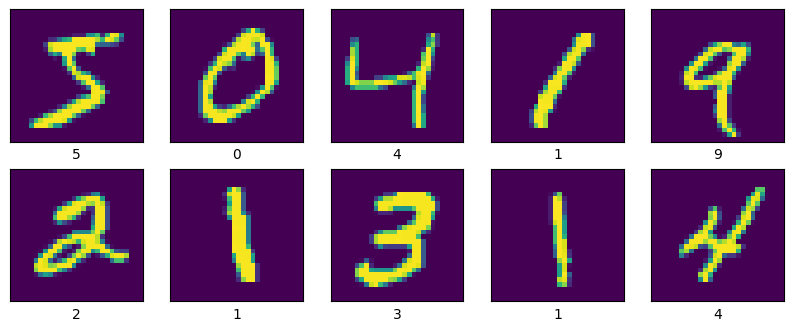

In [153]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [174]:
# Normalize pixel values to the range of [0, 1]
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28,1) / 255.0

X_train, X_test=np.array(X_train), np.array(X_test)


y_train= to_categorical(y_train, num_classes=10)
y_test= to_categorical(y_test, num_classes=10)


print("New shape of training images:", X_train.shape)
print("New shape of test images:", X_test.shape)




New shape of training images: (60000, 28, 28, 1)
New shape of test images: (10000, 28, 28, 1)


## Build and train a CNN

In [ ]:

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [180]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history_sample=model.fit(X_train, y_train, epochs=7, batch_size=500, validation_split=0.2)


Epoch 1/7
96/96 [==============================] - 43s 439ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0507 - val_accuracy: 0.9912
Epoch 2/7
96/96 [==============================] - 42s 436ms/step - loss: 6.9454e-04 - accuracy: 0.9998 - val_loss: 0.0492 - val_accuracy: 0.9909
Epoch 3/7
96/96 [==============================] - 41s 429ms/step - loss: 8.0104e-04 - accuracy: 0.9998 - val_loss: 0.0576 - val_accuracy: 0.9893
Epoch 4/7
96/96 [==============================] - 39s 405ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0507 - val_accuracy: 0.9906
Epoch 5/7
96/96 [==============================] - 40s 419ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0540 - val_accuracy: 0.9910
Epoch 6/7
96/96 [==============================] - 40s 421ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0558 - val_accuracy: 0.9899
Epoch 7/7
96/96 [==============================] - 43s 449ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0579 - val_accuracy: 0.989

## Evaluate the Model's performance

313/313 [==============================] - 3s 9ms/step - loss: 0.0451 - accuracy: 0.9904
Test Accuracy: 0.9904000163078308


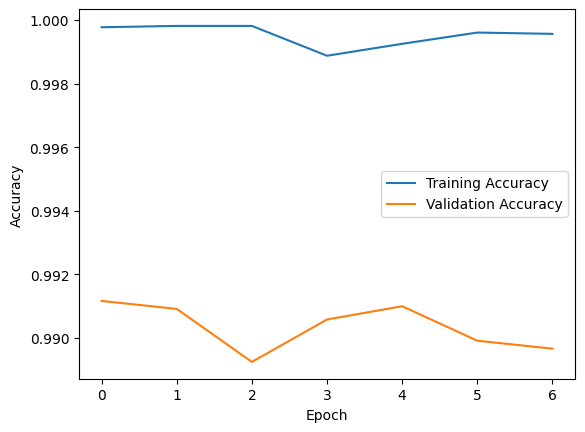

In [181]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history_sample.history['accuracy'], label='Training Accuracy')
plt.plot(history_sample.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
